In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

In [62]:
df = pd.read_csv('insurance.csv')
X, y = df.iloc[:, :-1], df.iloc[:, -1]
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [54]:
num_features = [0, 2, 3]
num_transformer = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])

In [55]:
cat_features = [1, 4, 5]
cat_transformer = OneHotEncoder(handle_unknown='ignore')

In [56]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

In [74]:
clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsRegressor())
])

In [75]:
search = GridSearchCV(estimator = clf,
                    param_grid = {'classifier__n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
                    cv=5)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [77]:
search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         [0, 2,
                                                                          3]),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                        

In [79]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008061,0.001337,0.005396,0.000783,1,{'classifier__n_neighbors': 1},0.698999,0.699623,0.619304,0.740113,0.585329,0.668673,0.057210,10
1,0.007003,0.000862,0.004922,0.000653,2,{'classifier__n_neighbors': 2},0.735341,0.785037,0.683975,0.774109,0.638391,0.723371,0.055306,5
2,0.007009,0.000891,0.005192,0.000404,3,{'classifier__n_neighbors': 3},0.729341,0.795912,0.693467,0.762617,0.663665,0.729000,0.047199,1
3,0.006240,0.000375,0.005254,0.000506,4,{'classifier__n_neighbors': 4},0.735746,0.784587,0.686467,0.756502,0.670542,0.726769,0.042646,2
4,0.006416,0.000508,0.005019,0.000031,5,{'classifier__n_neighbors': 5},0.739378,0.768364,0.705208,0.769585,0.649681,0.726443,0.045009,3
5,0.006458,0.000457,0.005144,0.000294,6,{'classifier__n_neighbors': 6},0.742674,0.761472,0.703832,0.775205,0.643376,0.725312,0.047483,4
6,0.005001,0.002531,0.006602,0.004624,7,{'classifier__n_neighbors': 7},0.738614,0.741613,0.698502,0.770074,0.639742,0.717709,0.045162,6
7,0.006605,0.000791,0.005195,0.000394,8,{'classifier__n_neighbors': 8},0.734239,0.739872,0.700951,0.749732,0.624882,0.709935,0.045575,8
8,0.006414,0.000483,0.005584,0.000483,9,{'classifier__n_neighbors': 9},0.731893,0.728544,0.713515,0.750879,0.633464,0.711659,0.040867,7
9,0.006115,0.000234,0.005602,0.000493,10,{'classifier__n_neighbors': 10},0.721951,0.719715,0.713636,0.733821,0.638380,0.705501,0.034194,9


In [80]:
pred = search.predict(X_test)

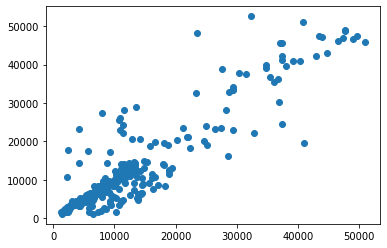

In [81]:
plt.scatter(pred, y_test)
plt.show()